In [1]:
import os 
from google.cloud import bigquery
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'credentials/service_account.json'
import pandas as pd
import time
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [336]:
query = open('queries\creditation_time.sql').read()
df = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')

In [6]:
sns.light_palette("#79C")

[(0.9416189672416196, 0.943616042212052, 0.9476594498033685),
 (0.8466285071266291, 0.8748928337696416, 0.9181275598426948),
 (0.7516380470116384, 0.8061696253272311, 0.8885956698820211),
 (0.6566475868966479, 0.7374464168848208, 0.8590637799213474),
 (0.5616571267816572, 0.6687232084424104, 0.8295318899606737),
 (0.4666666666666667, 0.6, 0.8)]

In [337]:
df.loc[(df['HAS_ASKED_FOR_ACCREDITATION'] == True) & (df['REQUEST_TIME_BUSINESS_DAYS'] >= 0)][['REQUEST_TIME_BUSINESS_DAYS', 'RESPONSE_TIME_BUSINESS_DAYS', 'PROCESS_TIME_BUSINESS_DAYS']].describe().to_csv('describe_creditation.csv')

In [338]:
df[['REQUEST_TIME_BUSINESS_DAYS', 'RESPONSE_TIME_BUSINESS_DAYS', 'PROCESS_TIME_BUSINESS_DAYS']].columns

Index(['REQUEST_TIME_BUSINESS_DAYS', 'RESPONSE_TIME_BUSINESS_DAYS',
       'PROCESS_TIME_BUSINESS_DAYS'],
      dtype='object')

In [339]:
df_boxplot = pd.DataFrame(columns=['metric', 'time'])
for column in ['REQUEST_TIME_BUSINESS_DAYS', 'RESPONSE_TIME_BUSINESS_DAYS']:
    temp_frame = pd.DataFrame(columns=['metric', 'time'])
    temp_frame['time'] = df.loc[(df['HAS_ASKED_FOR_ACCREDITATION'] == True) & (df['REQUEST_TIME_BUSINESS_DAYS'] >= 0)][column].copy()
    temp_frame['metric'] = column
    df_boxplot = pd.concat([df_boxplot, temp_frame])
df_boxplot = df_boxplot.reset_index(drop=True)

In [340]:
df_boxplot

,metric,time
0,REQUEST_TIME_BUSINESS_DAYS,0
1,REQUEST_TIME_BUSINESS_DAYS,0
2,REQUEST_TIME_BUSINESS_DAYS,30
3,REQUEST_TIME_BUSINESS_DAYS,5
4,REQUEST_TIME_BUSINESS_DAYS,0
...,...,...
1229,RESPONSE_TIME_BUSINESS_DAYS,0
1230,RESPONSE_TIME_BUSINESS_DAYS,1
1231,RESPONSE_TIME_BUSINESS_DAYS,0
1232,RESPONSE_TIME_BUSINESS_DAYS,0


In [72]:
df_boxplot = df_boxplot.loc[df_boxplot['time'] >=0]

In [143]:
df_boxplot

,metric,time
0,REQUEST_TIME_BUSINESS_DAYS,0
1,REQUEST_TIME_BUSINESS_DAYS,0
2,REQUEST_TIME_BUSINESS_DAYS,30
3,REQUEST_TIME_BUSINESS_DAYS,5
4,REQUEST_TIME_BUSINESS_DAYS,0
...,...,...
1229,RESPONSE_TIME_BUSINESS_DAYS,0
1230,RESPONSE_TIME_BUSINESS_DAYS,1
1231,RESPONSE_TIME_BUSINESS_DAYS,0
1232,RESPONSE_TIME_BUSINESS_DAYS,0


(0.0, 30.0)

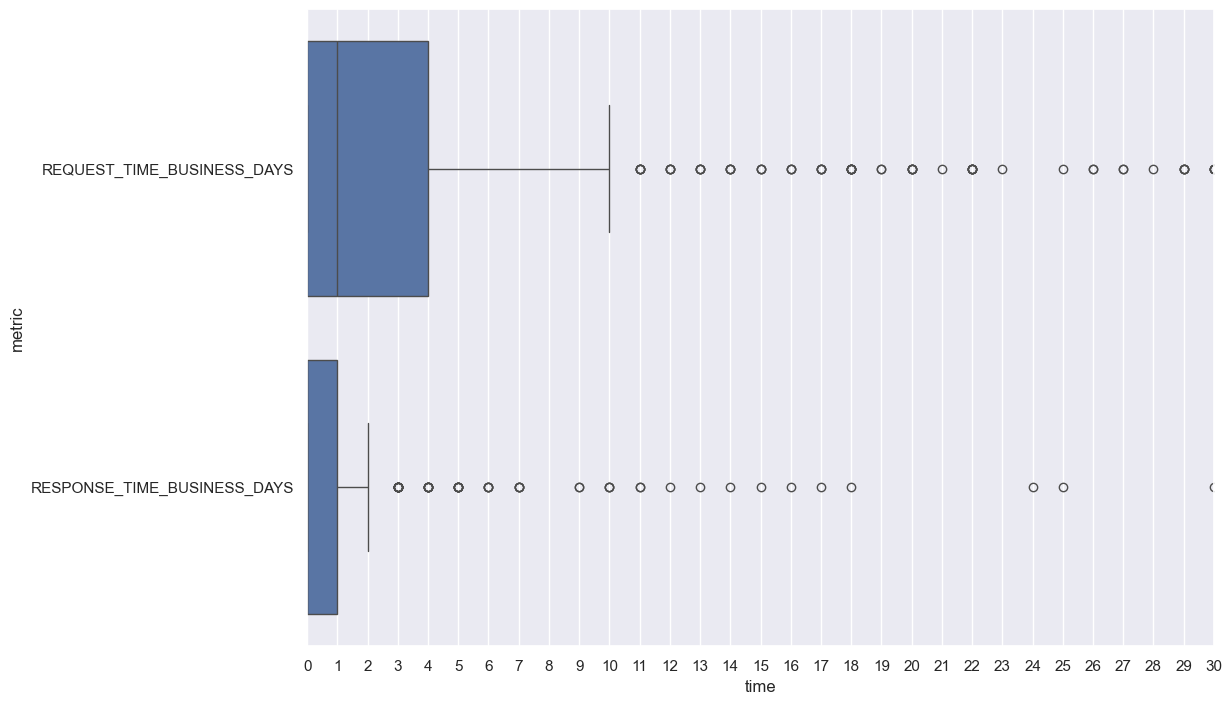

In [335]:
MAX = 30
figure = sns.boxplot(data=df_boxplot, y="metric", x="time")
figure.set_xticks(np.arange(0, MAX+1))
figure.set_xticklabels(np.arange(0, MAX+1).tolist())
figure.set_xlim(0, MAX)

Text(0, 0.5, 'Porcentagem Aculumada')

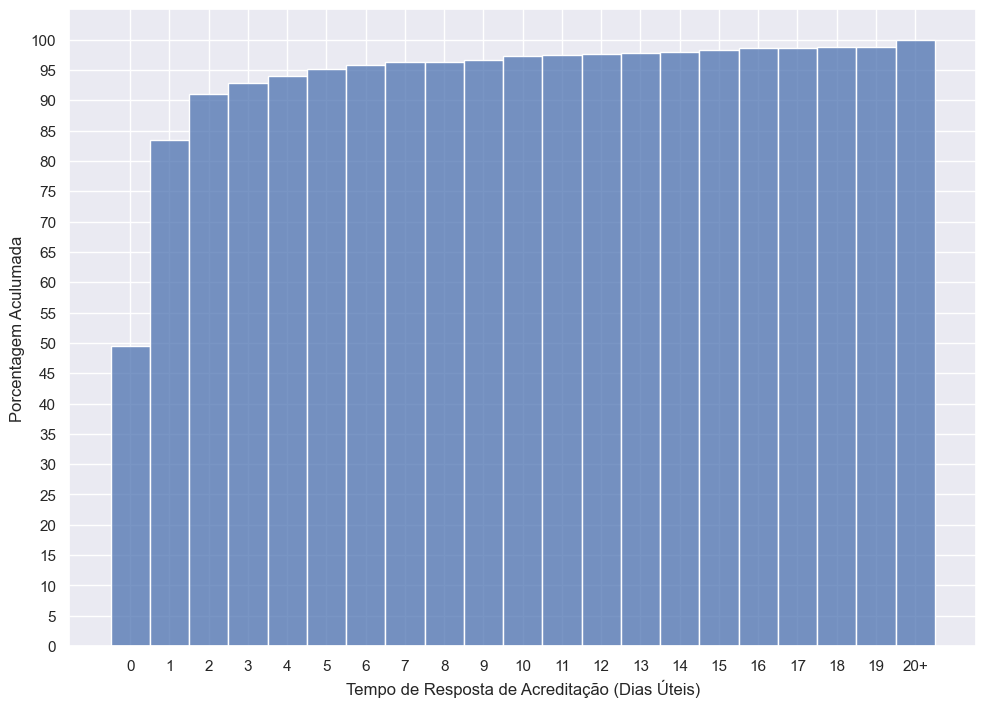

In [342]:
## Tempo de Resposta Acreditação

l = df.loc[df['HAS_ASKED_FOR_ACCREDITATION'] == True]['RESPONSE_TIME_BUSINESS_DAYS']
MAX = 20
figure = sns.histplot(data= np.clip(l, -1, MAX), stat = 'percent', discrete=True, cumulative = True,)
figure.set_xticks(np.arange(0, MAX+1))
figure.set_xticklabels(np.arange(0, MAX).tolist()+[f'{MAX}+'])
figure.set_xlabel('Tempo de Resposta de Acreditação (Dias Úteis)')
figure.set_yticks(np.arange(0, 105,5))
figure.set_ylabel('Porcentagem Aculumada')

In [333]:
## Tempo de Resposta Acreditação

l = df.loc[(df['HAS_ASKED_FOR_ACCREDITATION'] == True) & (df['REQUEST_TIME_BUSINESS_DAYS'] >= 0)]['REQUEST_TIME_BUSINESS_DAYS']
MAX = 30
figure = sns.histplot(data= np.clip(l, -1, MAX), stat = 'percent', discrete=False, cumulative = True)
figure.set_xticks(np.arange(0, MAX+1, 2))
figure.set_xticklabels(np.arange(0, MAX, 2).tolist()+[f'{MAX}+'])
figure.set_xlabel('Tempo de Requisição de Acreditação (Dias Úteis)')
figure.set_yticks(np.arange(0, 105,2))
figure.set_ylabel('Porcentagem Aculumada')

KeyError: 'HAS_ASKED_FOR_ACCREDITATION'

In [59]:
np.arange(1, MAX+1)+0.5

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])

In [108]:
query = open('queries\dau_conversion').read()
df_dau = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')

In [109]:
df_dau['TRIAL_DURATION'] = df_dau['TRIAL_DURATION'].astype('int')
df_dau['CLINIC_ID'] = df_dau['CLINIC_ID'].astype('int')
df_dau['IS_CONVERTED'] = df_dau['IS_CONVERTED'].replace({True: 1, False: 0})
df_dau['IS_CONVERTED'] = df_dau['IS_CONVERTED'].astype('int')
df_dau['ACTIVE_PATIENT_DAYS'] = df_dau['ACTIVE_PATIENT_DAYS'].astype('float')
df_dau['ACTIVE_FINANCE_DAYS'] = df_dau['ACTIVE_FINANCE_DAYS'].astype('float')
df_dau['ACTIVE_SETUP_DAYS'] = df_dau['ACTIVE_SETUP_DAYS'].astype('float')
df_dau['ACTIVE_SCHEDULE_DAYS'] = df_dau['ACTIVE_SCHEDULE_DAYS'].astype('float')
df_dau['ACTIVE_USER_DAYS'] = df_dau['ACTIVE_USER_DAYS'].astype('float')
df_dau['ACTIVE_MODULES_USED'] = (df_dau['ACTIVE_PATIENT_DAYS'] > 0).astype('int') + (df_dau['ACTIVE_FINANCE_DAYS'] > 0).astype('int') + (df_dau['ACTIVE_SETUP_DAYS'] > 0).astype('int') + (df_dau['ACTIVE_SCHEDULE_DAYS'] > 0).astype('int')


In [ ]:
df_dau.describe()

In [125]:
query = open('queries\dau_by_date').read()
df_dau_day = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')

In [126]:
df_dau_day = df_dau_day.loc[~df_dau_day['DAY_OF_WEEK'].isin([1,7])].reset_index(drop=True).sort_values('DATE')

In [131]:
df_dau_day = df_dau_day.set_index('DATE')

In [127]:
df_dau_day.describe().to_csv('dau.csv')

Text(0, 0.5, 'Usuários Ativos Diariamente')

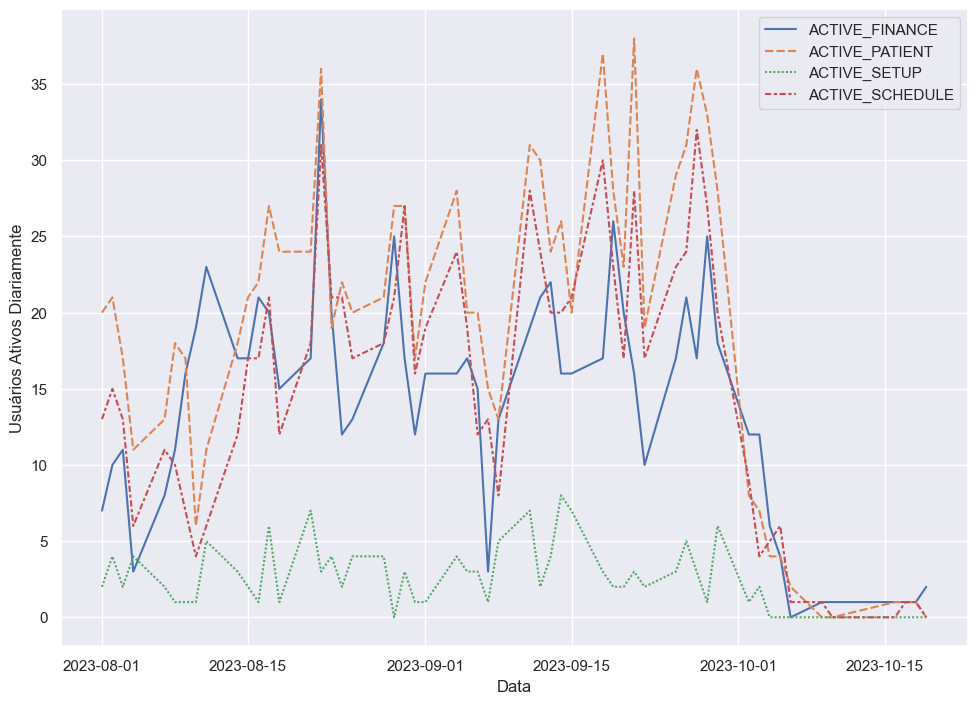

In [136]:
figure = sns.lineplot(df_dau_day.drop(columns=['DAY_OF_WEEK', 'ACTIVE_USER']))
figure.set_xlabel('Data')
figure.set_ylabel('Usuários Ativos Diariamente')

Text(0, 0.5, 'Usuários Ativos Diariamente')

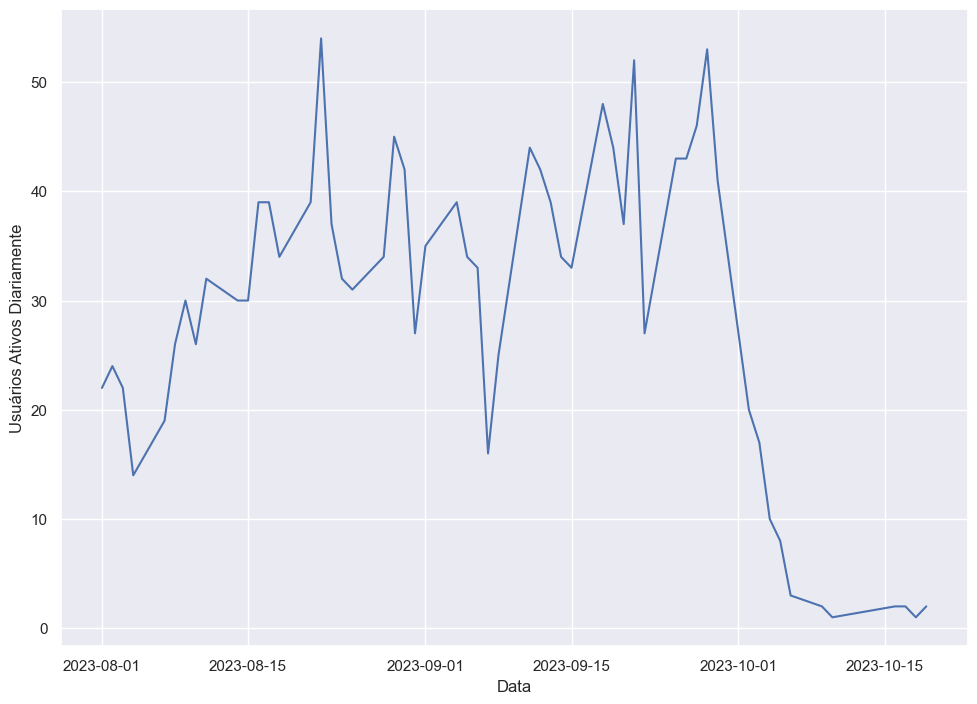

In [114]:
figure = sns.lineplot(df_dau_day, x='DATE', y='ACTIVE_USER', markers=True)
figure.set_xlabel('Data')
figure.set_ylabel('Usuários Ativos Diariamente')

In [261]:
figure = sns.lineplot(df_dau_day, x='DATE', y='ACTIVE_USER'm 'ACTIVE_FINANCE')
figure.set_xlabel('Dia')
figure.set_ylabel('Usuários Ativos')

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 55 and the vector passed to `y` has length 2.

In [270]:
df_dau_day = df_dau_day.set_index('DATE')

In [282]:
query = '''

SELECT
EXTRACT(DATE FROM ACTIVITY_AT) as DATE,
EXTRACT(DAYOFWEEK FROM ACTIVITY_AT) as DAY_OF_WEEK,
module,
count(distinct CLINIC_ID) as active_users
FROM `capim-404203.capim.activity_table` 
GROUP BY 1,2,3
ORDER BY DATE DESC

'''
df_dau_day_2 = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')

In [284]:
df_dau_day_2 = df_dau_day_2.loc[~df_dau_day_2['DAY_OF_WEEK'].isin([1,7])].reset_index(drop=True).sort_values('DATE')


Text(25.000000000000014, 0.5, 'Usuários Ativos')

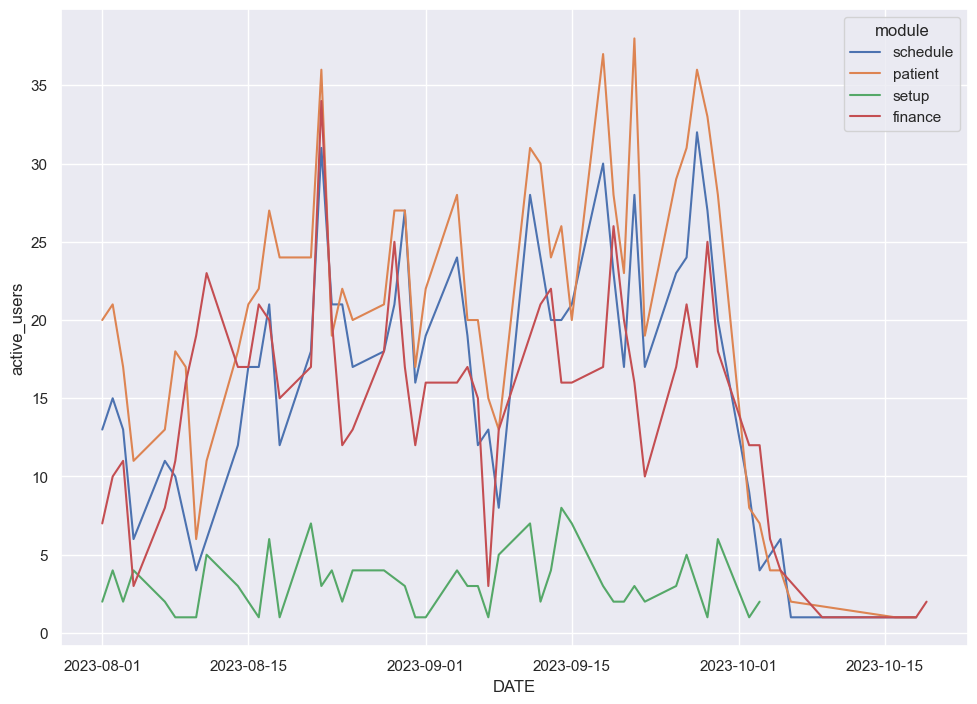

In [295]:
sns.lineplot(data = df_dau_day_2, y ='active_users', x= 'DATE',  hue='module')
figure.set_xlabel('Dia')
figure.set_ylabel('Usuários Ativos')

In [171]:
query = open('queries\dau_conversion').read()
df = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')
df['TRIAL_DURATION'] = df['TRIAL_DURATION'].astype('int')
df['CLINIC_ID'] = df['CLINIC_ID'].astype('int')
df['IS_CONVERTED'] = df['IS_CONVERTED'].replace({True: 1, False: 0})
df['IS_CONVERTED'] = df['IS_CONVERTED'].astype('int')
df['ACTIVE_PATIENT_DAYS'] = df['ACTIVE_PATIENT_DAYS'].astype('float')
df['ACTIVE_FINANCE_DAYS'] = df['ACTIVE_FINANCE_DAYS'].astype('float')
df['ACTIVE_SETUP_DAYS'] = df['ACTIVE_SETUP_DAYS'].astype('float')
df['ACTIVE_SCHEDULE_DAYS'] = df['ACTIVE_SCHEDULE_DAYS'].astype('float')
df['ACTIVE_USER_DAYS'] = df['ACTIVE_USER_DAYS'].astype('float')
df['ACTIVE_MODULES_USED'] = (df['ACTIVE_PATIENT_DAYS'] > 0).astype('int') + (df['ACTIVE_FINANCE_DAYS'] > 0).astype('int') + (df['ACTIVE_SETUP_DAYS'] > 0).astype('int') + (df['ACTIVE_SCHEDULE_DAYS'] > 0).astype('int')



In [181]:
df = df.loc[df['ACTIVE_USER_DAYS']  <= 100]

In [184]:
df.describe()

,CLINIC_ID,TRIAL_DURATION,IS_CHAIN_CLINIC,IS_CONVERTED,ACTIVE_FINANCE_DAYS,ACTIVE_PATIENT_DAYS,ACTIVE_SETUP_DAYS,ACTIVE_SCHEDULE_DAYS,ACTIVE_USER_DAYS,ACTIVE_USER_DAYS_RAW,ACTIVE_MODULES_USED
count,2057.000000,2057.000000,2057,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.00000,2057.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10152.723384,8.552261,NaN,0.183277,0.036221,0.078503,0.008818,0.063274,0.099108,0.74526,1.001458
std,669.141603,12.751338,NaN,0.386987,0.098015,0.130441,0.038308,0.117006,0.149413,1.13026,1.181281
min,8993.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9568.000000,7.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,10174.000000,7.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,10725.000000,7.000000,NaN,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857,1.00000,2.000000


Text(0, 0.5, 'Densidade de Clínicas em Trial')

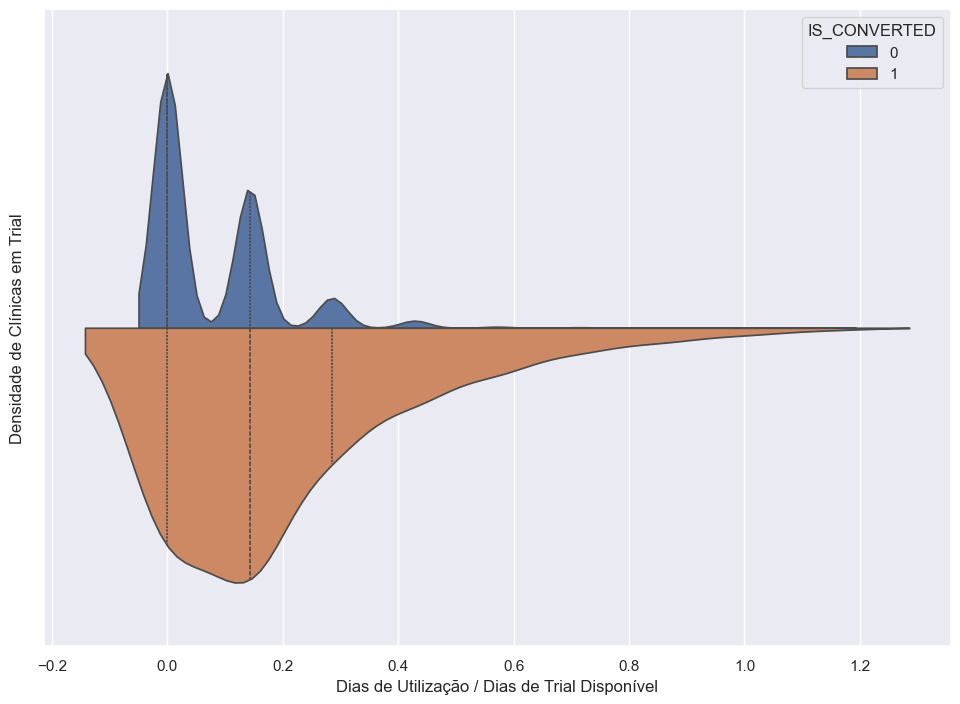

In [279]:
import matplotlib.pyplot as plt


figure = sns.violinplot(data=df.loc[df['TRIAL_DURATION'] == 7], x="ACTIVE_USER_DAYS",split=True, hue = 'IS_CONVERTED', inner="quartile")


figure.set_xlabel(r'Dias de Utilização / Dias de Trial Disponível')
figure.set_ylabel('Densidade de Clínicas em Trial')

Text(0, 0.5, 'Densidade de Clínicas em Trial')

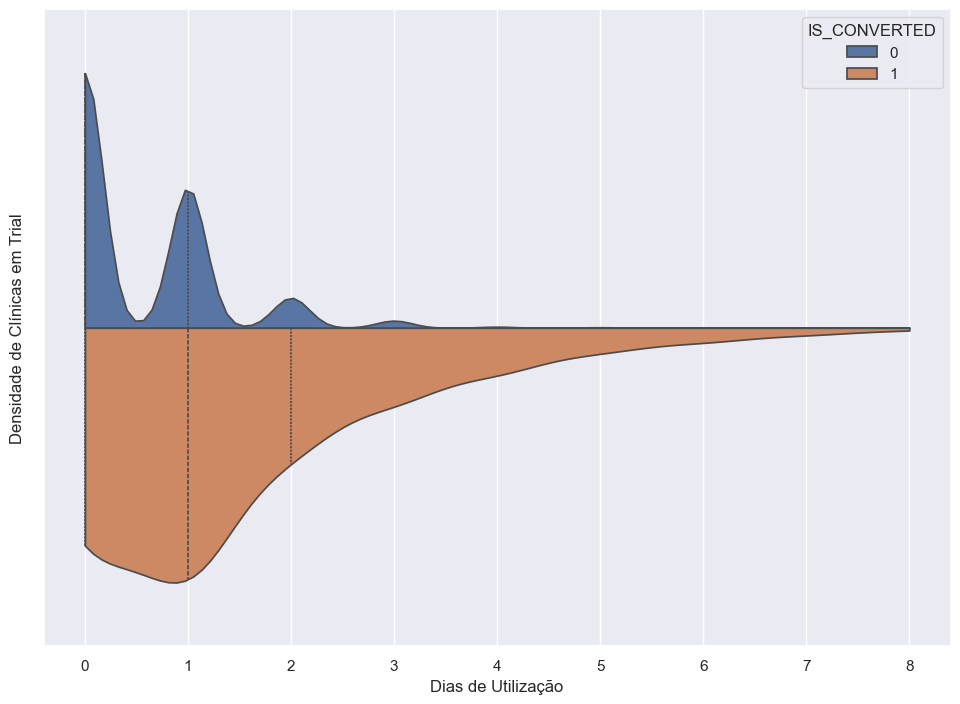

In [274]:
import matplotlib.pyplot as plt


figure = sns.violinplot(data=df.loc[df['TRIAL_DURATION'] == 7], x="ACTIVE_USER_DAYS_RAW",split=True, hue = 'IS_CONVERTED', inner="quartile", cut = 0)

figure.set_xlabel('Dias de Utilização')
figure.set_ylabel('Densidade de Clínicas em Trial')

In [280]:
query = open('queries\INTERACTIONS VS CONVERSION').read()
df = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')
df['TRIAL_DURATION'] = df['TRIAL_DURATION'].astype('int')
df['CLINIC_ID'] = df['CLINIC_ID'].astype('int')
df['IS_CONVERTED'] = df['IS_CONVERTED'].replace({True: 1, False: 0})
df['IS_CONVERTED'] = df['IS_CONVERTED'].astype('int')
df['ACTIVE_PATIENT_DAYS'] = df['ACTIVE_PATIENT_DAYS'].astype('float')
df['ACTIVE_FINANCE_DAYS'] = df['ACTIVE_FINANCE_DAYS'].astype('float')
df['ACTIVE_SETUP_DAYS'] = df['ACTIVE_SETUP_DAYS'].astype('float')
df['ACTIVE_SCHEDULE_DAYS'] = df['ACTIVE_SCHEDULE_DAYS'].astype('float')
df['ACTIVE_USER_DAYS'] = df['ACTIVE_USER_DAYS'].astype('float')
df['ACTIVE_MODULES_USED'] = (df['ACTIVE_PATIENT_DAYS'] > 0).astype('int') + (df['ACTIVE_FINANCE_DAYS'] > 0).astype('int') + (df['ACTIVE_SETUP_DAYS'] > 0).astype('int') + (df['ACTIVE_SCHEDULE_DAYS'] > 0).astype('int')



(0.0, 40.0)

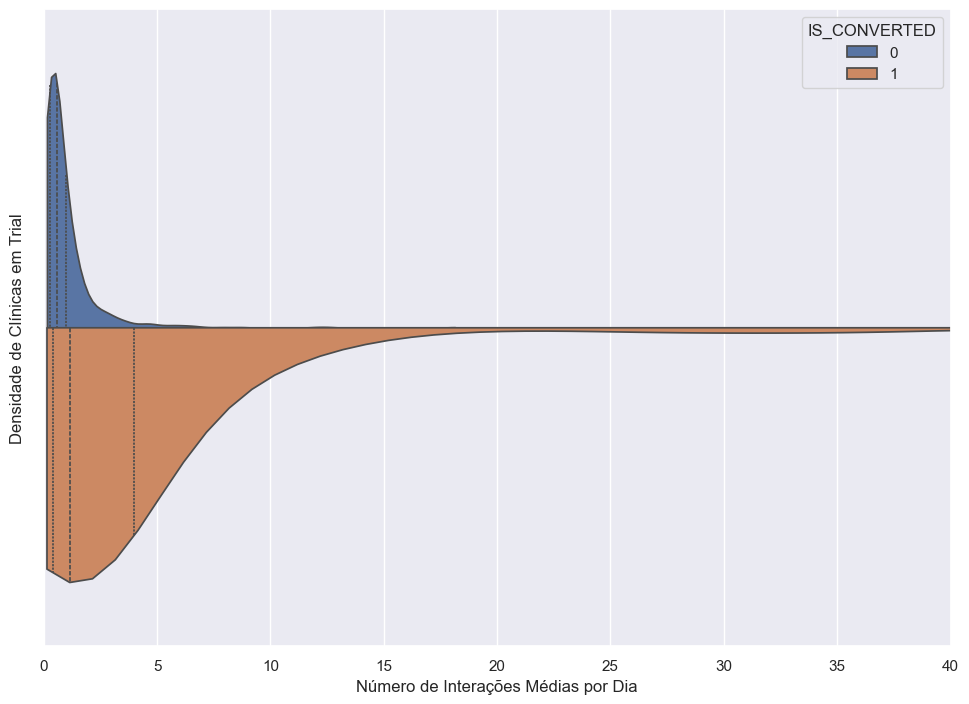

In [286]:
import matplotlib.pyplot as plt


figure = sns.violinplot(data=df.loc[df['TRIAL_DURATION'] == 7], x="ACTIVE_USER_DAYS",split=True, hue = 'IS_CONVERTED', inner="quartile", cut = 0)

figure.set_ylabel('Densidade de Clínicas em Trial')
figure.set_xlabel('Número de Interações Médias por Dia')
figure.set_xlim(0,40)

In [289]:
df_line_model = pd.read_csv('probs_of_conversion.csv')


In [306]:
df_line_model['probability'] = df_line_model['probability'] * 100

In [304]:
import matplotlib.ticker as mtick

Text(0, 0.5, 'Chance de Clínica Ser Convertida')

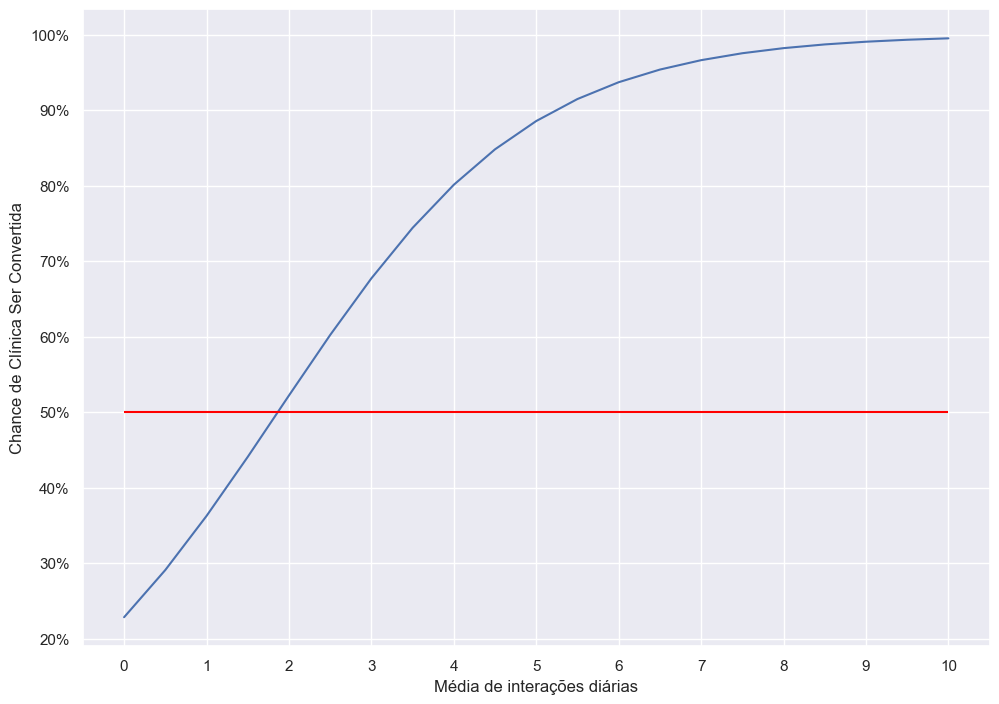

In [313]:
figure = sns.lineplot(df_line_model, x='ACTIVE_USER_DAYS', y = 'probability' )

figure.hlines(y=50,xmin=0,xmax=10, color = 'red')
figure.set_xticks(np.arange(0, 11, 1))
figure.set_xticklabels(np.arange(0, 11, 1))
figure.set_xlabel('Média de interações diárias')
figure.set_yticks(np.arange(20, 110,10))
figure.yaxis.set_major_formatter(mtick.PercentFormatter())
figure.set_ylabel('Chance de Clínica Ser Convertida')

In [316]:
query = open('queries\interactions_conversions_all.sql').read()
df_int = pd.read_gbq(query, project_id = 'capim-404203', dialect= 'standard')

In [320]:
df_int = df_int.replace({None: 0})

In [ ]:
## Tempo de Resposta Acreditação

l = df.loc[df['HAS_ASKED_FOR_ACCREDITATION'] == True]['RESPONSE_TIME_BUSINESS_DAYS']
MAX = 20
figure = sns.histplot(data= np.clip(l, -1, MAX), stat = 'percent', discrete=True, cumulative = True,)
figure.set_xticks(np.arange(0, MAX+1))
figure.set_xticklabels(np.arange(0, MAX).tolist()+[f'{MAX}+'])
figure.set_xlabel('Tempo de Resposta de Acreditação (Dias Úteis)')
figure.set_yticks(np.arange(0, 105,5))
figure.set_ylabel('Porcentagem Aculumada')

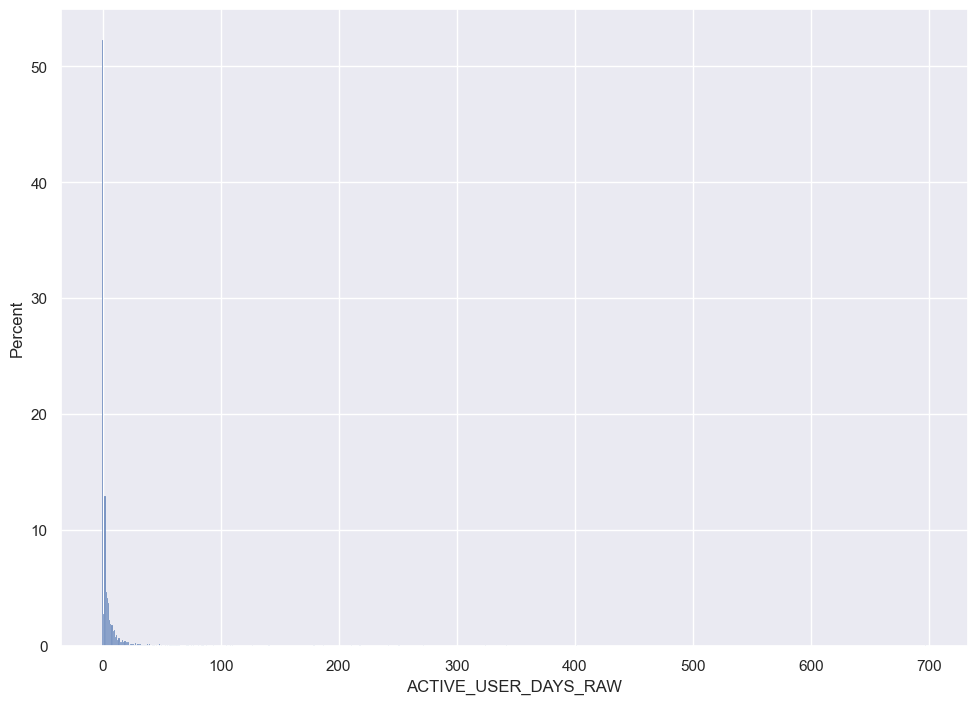

In [331]:
figure = sns.histplot(data= df_int['ACTIVE_USER_DAYS_RAW'], stat = 'percent', discrete=True)
MAX = 20
#figure.set_xticks(np.arange(0, MAX+1))
#figure.set_xticklabels(np.arange(0, MAX).tolist()+[f'{MAX}+'])

Text(0, 0.5, 'Porcentagem De Clínicas')

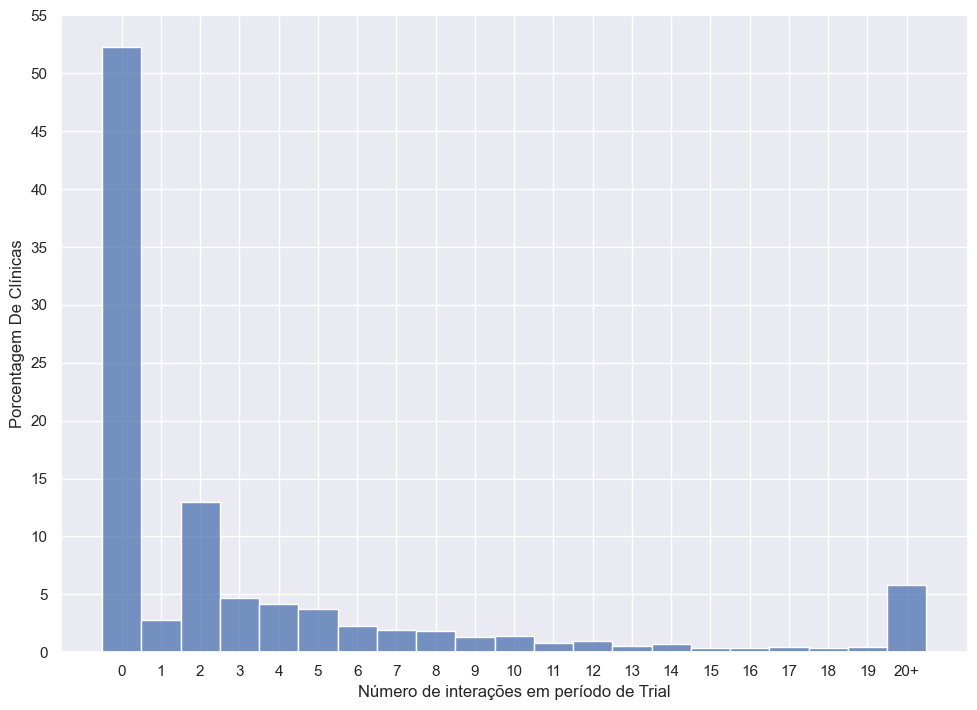

In [349]:

l = df_int['ACTIVE_USER_DAYS_RAW']
MAX = 20
figure = sns.histplot(data= np.clip(l, -1, MAX), stat = 'percent', discrete=True)
figure.set_xticks(np.arange(0, MAX+1))
figure.set_xticklabels(np.arange(0, MAX).tolist()+[f'{MAX}+'])
figure.set_xlabel('Número de interações em período de Trial')
figure.set_yticks(np.arange(0, 60,5))
figure.set_ylabel('Porcentagem De Clínicas')

Text(0, 0.5, 'Porcentagem De Clínicas (Acumulado)')

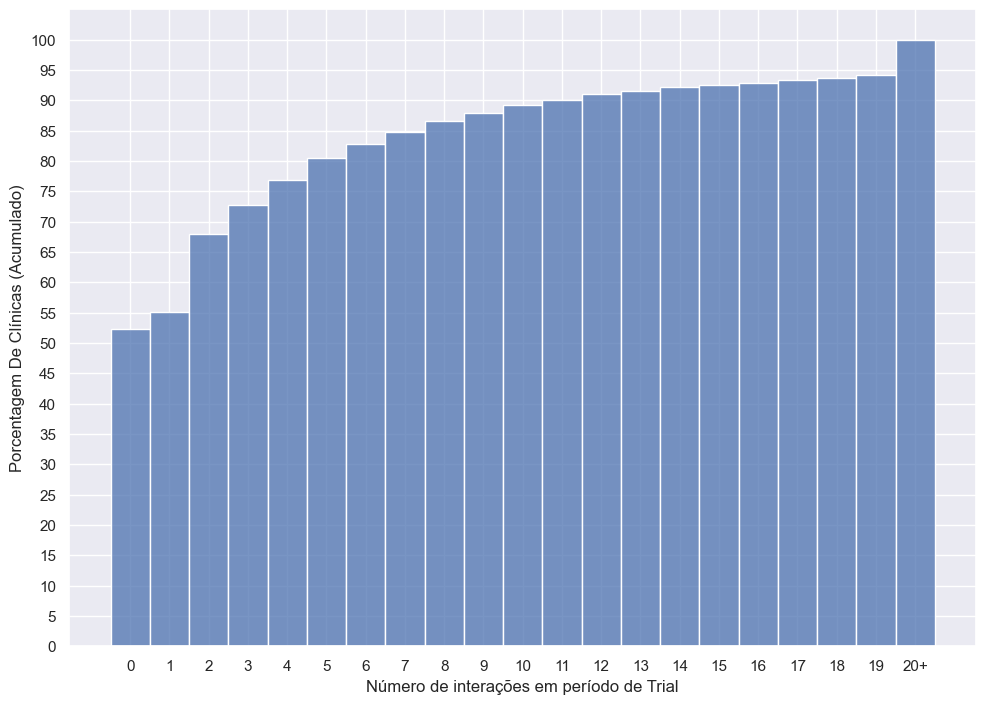

In [351]:

l = df_int['ACTIVE_USER_DAYS_RAW']
MAX = 20
figure = sns.histplot(data= np.clip(l, -1, MAX), stat = 'percent', discrete=True, cumulative=True)
figure.set_xticks(np.arange(0, MAX+1))
figure.set_xticklabels(np.arange(0, MAX).tolist()+[f'{MAX}+'])
figure.set_xlabel('Número de interações em período de Trial')
figure.set_yticks(np.arange(0, 105,5))
figure.set_ylabel('Porcentagem De Clínicas (Acumulado)')

In [363]:
df_int.loc[df_int['ACTIVE_USER_DAYS_RAW'] > 10].sum()

CLINIC_ID               2243613.000000000
TRIAL_DURATION             2209.000000000
IS_CHAIN_CLINIC                         0
IS_CONVERTED                          115
ACTIVE_FINANCE_DAYS         163.202025214
ACTIVE_PATIENT_DAYS         886.884503055
ACTIVE_SETUP_DAYS            20.595439220
ACTIVE_SCHEDULE_DAYS        239.266227257
ACTIVE_USER_DAYS           1309.948194699
ACTIVE_USER_DAYS_RAW                 9413
dtype: object

In [362]:
df_int.loc[df_int['ACTIVE_USER_DAYS_RAW'] > 10].count()

CLINIC_ID               220
TRIAL_DURATION          220
IS_CHAIN_CLINIC         220
IS_CONVERTED            220
ACTIVE_FINANCE_DAYS     220
ACTIVE_PATIENT_DAYS     220
ACTIVE_SETUP_DAYS       220
ACTIVE_SCHEDULE_DAYS    220
ACTIVE_USER_DAYS        220
ACTIVE_USER_DAYS_RAW    220
dtype: int64